<a href="https://colab.research.google.com/github/daudibrahimhasan/Loan-Prediction/blob/main/LP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

# Path to your file (adjust if stored elsewhere)
path ='/content/drive/My Drive/datasets/loan2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read Dataset

In [ ]:
data = pd.read_csv(path)
print(data.head())
print("\n\nColumn Names\n\n")
print(data.columns)

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

Clean up column names

In [ ]:
# clean up column names (remove spaces, unify format)
data.columns = data.columns.str.strip()

Check target column name

In [ ]:
target_col = None
for col in data.columns:
    if col.lower().replace(" ", "_") == "loan_status":
        target_col = col
        break

if target_col is None:
    raise ValueError("Target column 'Loan_Status' not found in dataset. Available columns: " + str(data.columns))

Label encode the target variable

In [ ]:
encode = LabelEncoder()
data[target_col] = encode.fit_transform(data[target_col])

In [ ]:
# drop rows with missing values
data.dropna(how='any', inplace=True)

Train-Test split

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

Separate features and target

In [ ]:
# separate features and target safely
cols_to_drop_train = [col for col in ['Loan_ID', target_col] if col in train.columns]
train_x = train.drop(columns=cols_to_drop_train, axis=1)
train_y = train[target_col]

cols_to_drop_test = [col for col in ['Loan_ID', target_col] if col in test.columns]
test_x = test.drop(columns=cols_to_drop_test, axis=1)
test_y = test[target_col]

One-hot encode categorical features

In [ ]:
# one-hot encode categorical features
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)

Ensure both train & test have the same columns

In [ ]:
train_x, test_x = train_x.align(test_x, join='left', axis=1, fill_value=0)

In [ ]:
print('Shape of training data : ', train_x.shape)
print('Shape of testing data  : ', test_x.shape)

Shape of training data :  (3415, 14)
Shape of testing data  :  (854, 14)


Create and Train model

In [ ]:
model = LogisticRegression(max_iter=1000)  # safer for convergence
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

Predictions

In [ ]:
predict = model.predict(test_x)

print('Predicted Values on Test Data:\n', predict)

print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(test_y, predict))

Predicted Values on Test Data:
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0
 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1
 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0

VISIUALIZATION

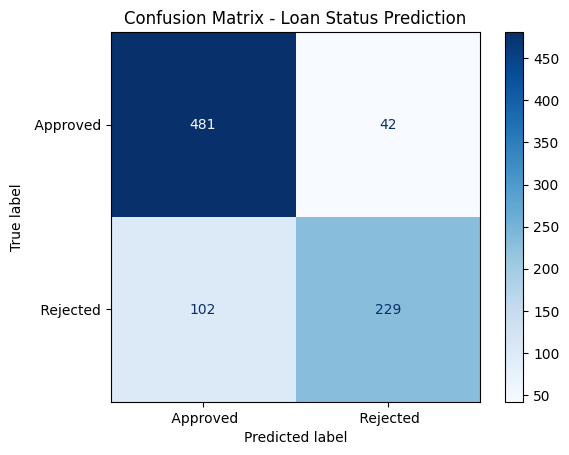

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, test_x, test_y,
                                      display_labels=encode.classes_,  # original labels
                                      cmap=plt.cm.Blues,
                                      values_format='d')

plt.title("Confusion Matrix - Loan Status Prediction")
plt.show()
